In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
trainingdata = pd.read_csv("trainingdata.csv",header=None)
validationdata1 = pd.read_csv("validationdata1.csv",header=None)
validationdata2 = pd.read_csv("validationdata2.csv",header=None)

In [3]:
trainingdata.shape

(200, 3)

In [4]:
faulty  = trainingdata[trainingdata[2] == 1]
normal  = trainingdata[trainingdata[2] == -1]

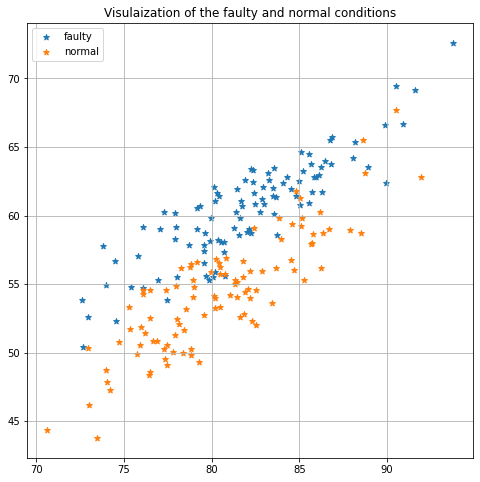

In [5]:
fig = plt.figure(figsize=(8,8))
plt.scatter(faulty[0],faulty[1],marker='*',label='faulty')
plt.scatter(normal[0], normal[1], marker = '*',label = 'normal')
plt.title('Visulaization of the faulty and normal conditions')
plt.grid(True)
plt.legend()
plt.show()

## Decision with Maximum likelihood rule and Gaussian class hypothesis

In [6]:
# find the mean of the data for both faulty and normal data  
m1 = np.mean(faulty.iloc[:,0:2])
m2 = np.mean(normal.iloc[:,0:2])

In [7]:
m1 , m2

(0    81.969205
 1    60.404890
 dtype: float64,
 0    80.448923
 1    54.403710
 dtype: float64)

In [8]:
#build the covariance matrix
s1 = np.cov(faulty.iloc[:,0:2],rowvar=False) 
s2 = np.cov(normal.iloc[:,0:2],rowvar=False)

In [9]:
s1 , s2

(array([[18.74918748, 14.11957357],
        [14.11957357, 13.99872364]]),
 array([[17.66827971, 15.11477251],
        [15.11477251, 17.69416759]]))

In [81]:
def probfault(X, meanX, covX):
    d  = X.shape[0]
    frac1 = 1/((2*np.pi)**(d/2) * np.sqrt(np.linalg.det(covX)))
    prob = frac1 * np.exp((-1/2) * np.matmul(np.matmul((X - meanX).T , np.linalg.inv(covX)), (X - meanX)))
    return prob

In [86]:
pF = []
pN = []
decision = []
for i in range(validationdata1.shape[0]):
    pF = probfault(validationdata1.iloc[i,0:2].T , m1.T, s1)
    pN = probfault(validationdata1.iloc[i,0:2].T , m2.T, s2)
        
    if pF <= pN :
        decision.append(-1)
    else:
        decision.append(1)    

In [94]:
len(decision)

187

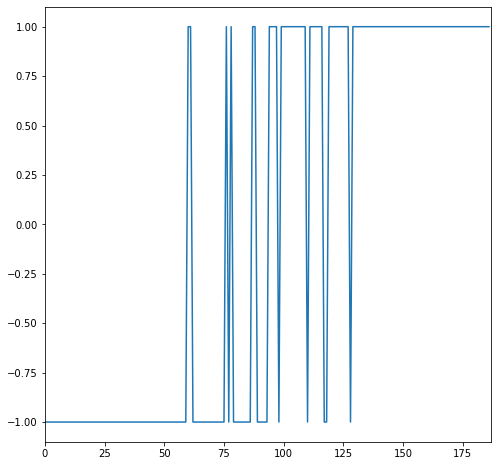

In [96]:
fig = plt.figure(figsize=(8,8))
plt.plot(decision)
plt.xlim(0,len(decision))
plt.grid()
plt.show()